# 1. Word2Vec

[1] Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. arXiv preprint arXiv:1301. 3781

[2] wikidocs.net/50739 "딥러닝을 이용한 자연어 처리 입문"

[3] word2vec.kr/search

## 1-1. 패키지 호출하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

/Users/leeju/Dev_dir/.venv/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## 1-2. 데이터 불러오기

In [2]:
# 최초 한 번만 실행
#urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt',
#                           filename='ratings.txt')
train_data = pd.read_table('ratings.txt')
print(train_data.shape)
train_data[:5]

(200000, 3)


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


## 1-3. 전처리하기

In [3]:
# Null 처리
print("Null 값이 있나요? {}".format(train_data.isnull().values.any()))  # Null 확인
train_data = train_data.dropna(how='any')  # Null 제거
print(train_data.shape)

Null 값이 있나요? True
(199992, 3)


In [34]:
# 정규표현식으로 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
train_data[:5]

/Users/leeju/Dev_dir/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [35]:
# 불용어 처리
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘',
             '걍', '과', '도', '를', '으로', '자', '에', '와', ' 한', '한다']

# 형태소 분석기를 사용한 Tokenization
okt = Okt()
tokenized_data = []
for sentence in tqdm(train_data['document']):
    temp_x = okt.morphs(sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords]
    tokenized_data.append(temp_x)

100%|██████████| 199992/199992 [06:00<00:00, 554.57it/s]


리뷰 최대 길이 :  73
리뷰 평균 길이 :  11.05353714148566


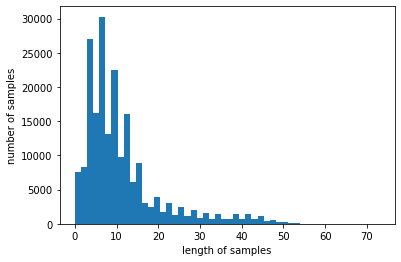

In [36]:
# 리뷰 길이 확인
print('리뷰 최대 길이 : ', max(len(L) for L in tokenized_data))
print('리뷰 평균 길이 : ', sum(map(len, tokenized_data)) / len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 1-4. Word2Vec 모델 구축하기

In [37]:
model = Word2Vec(sentences=tokenized_data,
                 vector_size=100,
                 window=5,
                 min_count=5,
                 workers=-1,
                 sg=1,
                 epochs=5000)

In [38]:
print("단어의 수 : {}".format(model.wv.vectors.shape[0]))
print("차원의 수 : {}".format(model.wv.vectors.shape[1]))

단어의 수 : 16479
차원의 수 : 100


## 1-5. 모델 평가 및 저장

In [41]:
print(model.wv.most_similar('기생충'))

[('지독하다', 0.38068485260009766), ('외우다', 0.3805617690086365), ('적절하다', 0.37237516045570374), ('은행강도', 0.36293908953666687), ('은희', 0.36284807324409485), ('노가다', 0.32880112528800964), ('떤다', 0.32659438252449036), ('전장', 0.3255884349346161), ('순식간', 0.3255867063999176), ('물이', 0.31442317366600037)]


In [49]:
# 기생충 - 송강호
print(model.wv.most_similar(positive=['기생충'], negative=['송강호'], topn=10))

[('아낌없다', 0.34944599866867065), ('감정이입', 0.3392691910266876), ('떤다', 0.33451810479164124), ('할기다', 0.32139647006988525), ('화표', 0.32029104232788086), ('겉', 0.3200811743736267), ('신선', 0.31986039876937866), ('관세음보살', 0.31666815280914307), ('서양', 0.3110984265804291), ('가용', 0.31034931540489197)]


In [50]:
# 추격자 - 하정우
print(model.wv.most_similar(positive=['추격자'], negative=['하정우'], topn=10))

[('어느새다', 0.36168918013572693), ('부터는', 0.32504087686538696), ('쫄깃', 0.3227267563343048), ('동심', 0.321443647146225), ('언더월드', 0.3123878836631775), ('무렵', 0.30663377046585083), ('형상', 0.3051810562610626), ('매치', 0.30299457907676697), ('배움', 0.3011753261089325), ('소꿉놀이', 0.29824137687683105)]


In [55]:
# 기생충 - 송강호 + 하정우
print(model.wv.most_similar(positive=['기생충', '하정우'], negative=['송강호'], topn=10))

[('감정이입', 0.3934168517589569), ('아낌없다', 0.38471418619155884), ('장면', 0.37241846323013306), ('격인', 0.33966749906539917), ('에서라도', 0.3353898525238037), ('한경직', 0.3345716893672943), ('괴리', 0.333333820104599), ('열렬하다', 0.3302147388458252), ('영도', 0.3296225666999817), ('화끈', 0.32733574509620667)]


In [56]:
# 저장하기
model.wv.save_word2vec_format('rating_w2v')

In [57]:
# 불러오기
from gensim.models import KeyedVectors
model_reroad = KeyedVectors.load_word2vec_format('rating_w2v')
print(model_reroad.most_similar('기생충'))

[('지독하다', 0.38068485260009766), ('외우다', 0.3805617690086365), ('적절하다', 0.37237516045570374), ('은행강도', 0.36293908953666687), ('은희', 0.36284807324409485), ('노가다', 0.32880112528800964), ('떤다', 0.32659438252449036), ('전장', 0.3255884349346161), ('순식간', 0.3255867063999176), ('물이', 0.31442317366600037)]


In [58]:
print(model_reroad.most_similar(positive=['기생충', '하정우'], negative=['송강호'], topn=10))

[('감정이입', 0.3934168517589569), ('아낌없다', 0.38471418619155884), ('장면', 0.37241846323013306), ('격인', 0.33966749906539917), ('에서라도', 0.3353898525238037), ('한경직', 0.3345716893672943), ('괴리', 0.333333820104599), ('열렬하다', 0.3302147388458252), ('영도', 0.3296225666999817), ('화끈', 0.32733574509620667)]


# 2. VAE with flatten layer

[1] Kingma, D. P., & Welling, M. (2013). Auto-encoding variational bayes. arXiv prepring arXiv:1312 6114

[2] https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras

## 2-1. 패키지 호출하기

In [1]:
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
%matplotlib inline

In [2]:
"""def sampling
@ Reparametrization Trick
@ Instead of sampling from Q(z|X), sample eps = N(0, I)
@ z = z_mean + sqrt(var) * eps
"""
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim)) # by default; mean=0 and std=1
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

## 2-2. 데이터 불러오기

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_size = x_train.shape[1] # 28
original_dim = image_size * image_size # 28 * 28

## 2-3. 전처리하기

In [4]:
# Preprocessing
x_train = np.reshape(x_train, [-1, original_dim]) # Flatten
x_test = np.reshape(x_train, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Hyperparameter
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2

## 2-4. VAE with flatten layer 모델 구축하기

In [5]:
### Encoder
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# Use reparametrization trick to push the sampling out as input
# Note that 'output_shape' isn't necessary
# sampling function returns z_mean + K.exp(0.5 * z_log_var) * epsilon
z = Lambda(sampling,
           output_shape=(latent_dim, ),
           name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense[0][0]                      
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense[0][0]                      
____________________________________________________________________________________________

In [6]:
### Decoder
latent_inputs = Input(shape=(latent_dim, ), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               402192    
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________


In [7]:
### VAE
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

## 2-5. 모델 학습 및 평가

In [8]:
epochs = 10
if __name__ == '__main__':
    models = (encoder, decoder)
    data = (x_test, y_test)

    # VAE loss = mse_loss or xent_loss + kl_loss
    reconstruction_loss = binary_crossentropy(inputs, outputs)

    #reconstruction_loss = mse(inputs, outputs)
    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    vae.summary()

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
    mc = ModelCheckpoint('best_VAE_mnist.h5',
                         monitor='val_loss', mode='min', save_best_only=True)
    history = vae.fit(x_train, epochs=epochs, batch_size=batch_size,
                      validation_data=(x_test, None), callbacks=[es, mc])

Model: "vae_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
encoder (Functional)            [(None, 2), (None, 2 403972      encoder_input[0][0]              
__________________________________________________________________________________________________
decoder (Functional)            (None, 784)          403728      encoder[0][2]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      encoder_input[0][0]              
____________________________________________________________________________________________

### 2-5-1. Viz: Loss

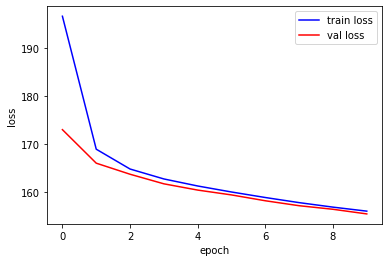

In [9]:
fig, loss_ax = plt.subplots()
loss_ax.plot(history.history['loss'], 'b', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')
plt.show()

### 2-5-2. Viz: Latent space

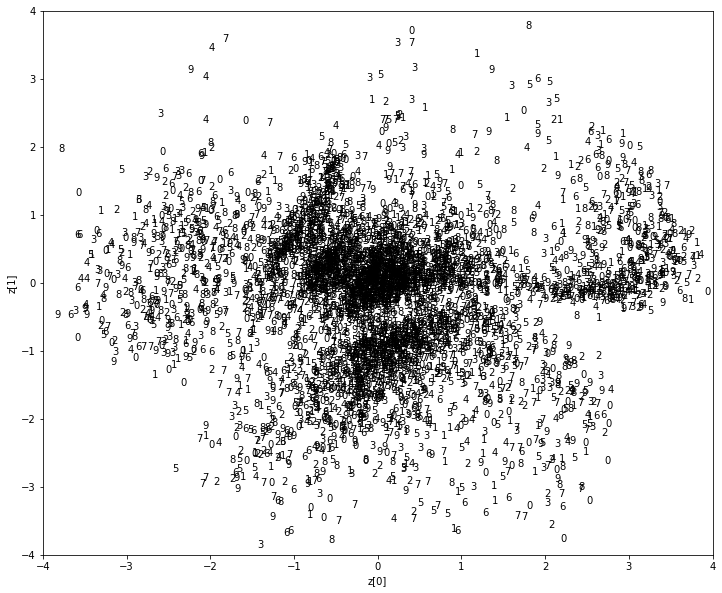

In [10]:
xmin = ymin = -4
xmax = ymax = +4

# display a 2D plot of the digit classes in the latent space
z, _, _ = encoder.predict(x_test,
                          batch_size=batch_size)
plt.figure(figsize=(12, 10))

# axes x and y ranges
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

# subsample to reduce density of points on the plot
z = z[0::2]
y_test = y_test[0::2]
plt.scatter(z[:, 0], z[:, 1], marker="")

for i, digit in enumerate(y_test):
    axes.annotate(digit, (z[i, 0], z[i, 1]))
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

### 2-5-3. Viz: Generated obj

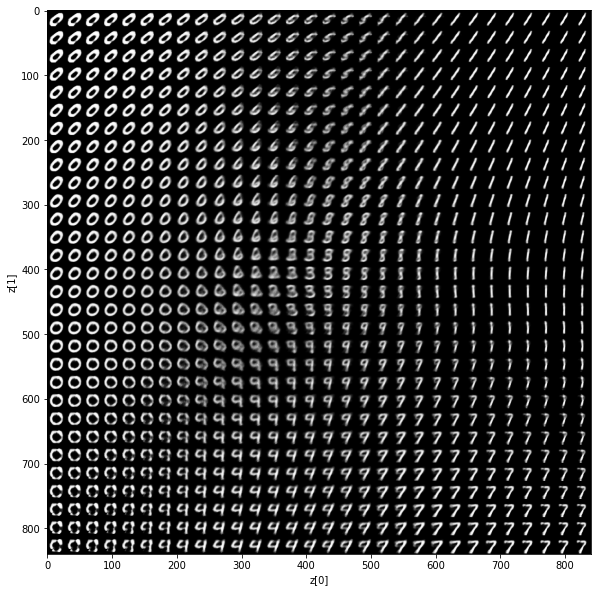

In [11]:
# display a 30x30 2D manifold of digits
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# linearly spaced coordinates corresponding to the 2D plot
# of digit classes in the latent space
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
start_range = digit_size // 2
end_range = n * digit_size + start_range + 1
pixel_range = np.arange(start_range, end_range, digit_size)

sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)

plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(figure, cmap='Greys_r')
plt.show()

# 3. VAE with convolutional layer

## 3-1. 패키지 호출하기

In [12]:
from tensorflow.keras.layers import Lambda, Input, Dense,Conv2D, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
%matplotlib inline

In [13]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

## 3-2. 데이터 불러오기

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 3-3. 전처리하기

In [15]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3 # multi-kernel CNN
filters = 16
latent_dim = 2

## 3-4. VAE with conv layer 모델 구축하기

In [16]:
### Encoder
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
for i in range(2):
    filters *= 2 # filters = 32, 64
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)
    
# shape info neede to build Decoder model
shape = K.int_shape(x)

# Generate latent vector Q(z|X)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# Use reparametrization tricks to push the sampling out as input
# Note that 'output_shape' isn't necessary
z = Lambda(sampling, output_shape=(latent_dim, ), name='z')([z_mean, z_log_var])

encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3136)         0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [17]:
### Decoder
latent_inputs = Input(shape=(latent_dim, ), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3],
          activation='relu')(latent_inputs) # 2nd Conv2D shape; 7 * 7 * 256
x = Reshape((shape[1], shape[2], shape[3]))(x)

for i in range(2):
    x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       activation='relu',
                       strides=2,
                       padding='same')(x)
    filters //= 2 # 몫만 가져오기
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_outputs')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
decoder_outputs (Conv2DTrans (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

In [18]:
### VAE
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

## 3-5. 모델 학습 및 평가

In [19]:
epochs = 10
if __name__ == '__main__':
    models = (encoder, decoder)
    data = (x_test, y_test)
    reconstruction_loss = binary_crossentropy(K.flatten(inputs),
                                              K.flatten(outputs))
    #reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
    reconstruction_loss *= image_size * image_size
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='rmsprop')
    vae.summary()

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_VAE_mnist_CNN.h5', monitor='val_loss', mode='min', save_best_only=True)
    history = vae.fit(x_train, epochs=epochs, batch_size=batch_size,
                      validation_data=(x_test, None), callbacks=[es, mc])

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
encoder (Functional)            [(None, 2), (None, 2 69076       encoder_input[0][0]              
__________________________________________________________________________________________________
decoder (Functional)            (None, 28, 28, 1)    65089       encoder[0][2]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         encoder_input[0][0]              
________________________________________________________________________________________________

Epoch 7/10
469/469 [==============================] - 36s 78ms/step - loss: 160.7792 - val_loss: 158.2401
Epoch 8/10
469/469 [==============================] - 37s 79ms/step - loss: 159.1559 - val_loss: 157.8031
Epoch 9/10
469/469 [==============================] - 37s 79ms/step - loss: 157.7717 - val_loss: 156.7231
Epoch 10/10
469/469 [==============================] - 37s 79ms/step - loss: 156.6392 - val_loss: 158.3770


### 3-5-1. Viz: Loss

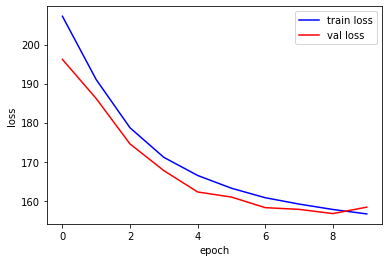

In [20]:
fig, loss_ax = plt.subplots()
loss_ax.plot(history.history['loss'], 'b', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')
plt.show()

### 3-5-2. Viz: Latent space

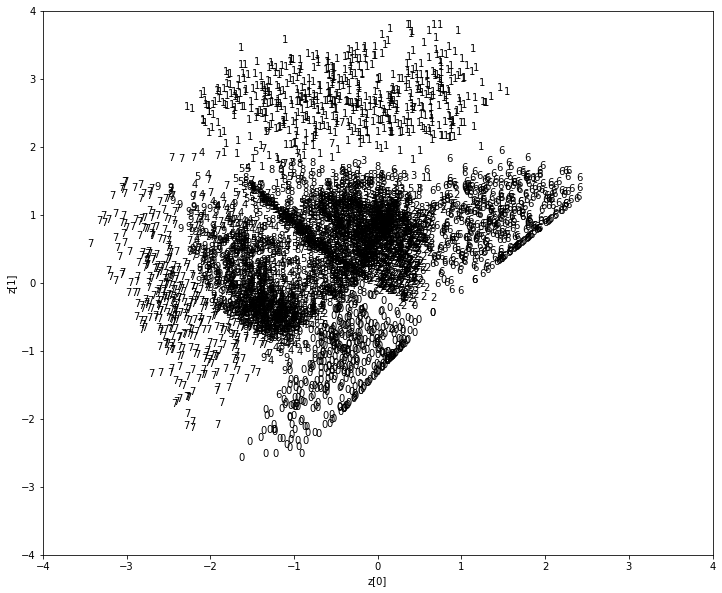

In [21]:
xmin = ymin = -4
xmax = ymax = +4

# display a 2D plot of the digit classes in the latent space
z, _, _ = encoder.predict(x_test,
                          batch_size=batch_size)
plt.figure(figsize=(12, 10))

# axes x and y ranges
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

# subsample to reduce density of points on the plot
z = z[0::2]
y_test = y_test[0::2]

plt.scatter(z[:, 0], z[:, 1], marker="")
for i, digit in enumerate(y_test):
    axes.annotate(digit, (z[i, 0], z[i, 1]))
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

### 3-5-3. Viz: Generated obj

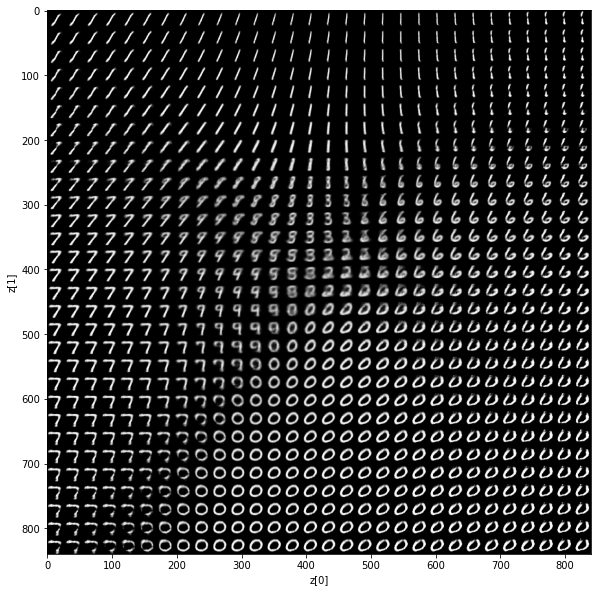

In [22]:
# display a 30x30 2D manifold of digits
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# linearly spaced coordinates corresponding to the 2D plot
# of digit classes in the latent space
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
start_range = digit_size // 2
end_range = n * digit_size + start_range + 1
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)

plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(figure, cmap='Greys_r')
plt.show()